In [1]:
%load_ext autoreload
%autoreload 2  

import numpy as np
import pandas as pd
import yfinance as yf
import functions as f
import matplotlib.pyplot as plt
import datetime as dt
import funcoes as f

import warnings
warnings.filterwarnings('ignore')

# from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA

In [2]:
periodos = 12
oos = 1

stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date').iloc[ : , :15]

In [3]:
def weight_eigen(df, cov_estimator=f.sample_cov, **kwargs):
    df  = f.returns(df)
    
    cov_matrix = cov_estimator(df)
    
    D, S = np.linalg.eigh(cov_matrix)
    
    res = S[:,-1] / np.sum(S[:,-1]) # Normalize to sum to 1
    return res
    
    
weight_eigen(stock_prices)

array([0.03083966, 0.05164332, 0.06621065, 0.09314435, 0.06751207,
       0.05260678, 0.14027793, 0.06827047, 0.07662046, 0.06700974,
       0.04180633, 0.03971001, 0.05399764, 0.10234442, 0.04800616])

In [4]:
bova = f.returns(stock_prices['BOVA11.SA'])
rets_ew = f.pipeline(stock_prices, periodos, oos, algo=f.weight_ew)
rets_eigen = f.pipeline(stock_prices, periodos, oos, algo=weight_eigen)

,Annualized Return,Annualized Vol,Sharpe Ratio,Sortino Ratio,Average Drawdown,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
BOVA11,0.04081,0.22358,0.04675,0.22616,-0.14158,-0.41984,-0.60601,6.07060,0.10696,0.13614
EW,0.10456,0.24608,0.29457,0.59622,-0.09843,-0.38154,-0.50075,5.36449,0.11191,0.13827
Eigen,-0.16897,0.54670,-0.35557,-0.02325,-0.48276,-0.95878,-1.15990,7.82751,0.28966,0.39529


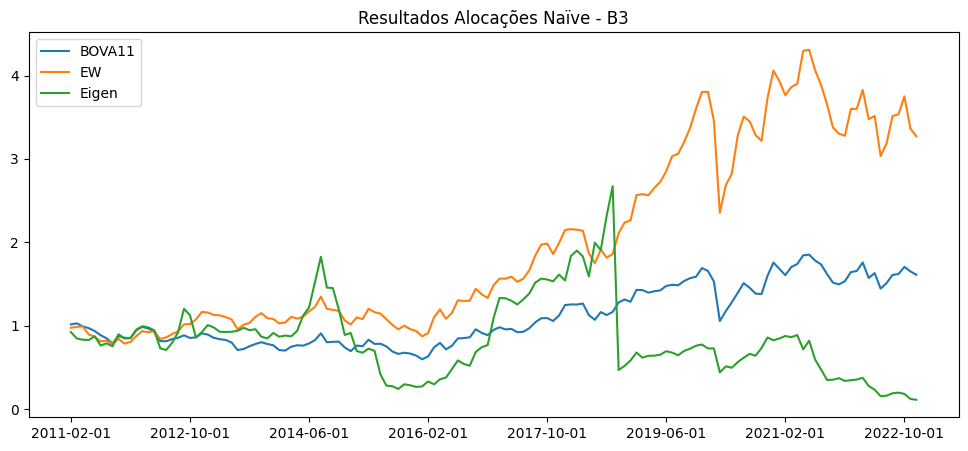

In [5]:
naive_portfolios_results = pd.DataFrame(
    {"BOVA11": bova[rets_ew.index.min():],
     "EW": rets_ew['rets'],
    "Eigen": rets_eigen['rets']
    }
)

(1+naive_portfolios_results).cumprod().plot(figsize=(12,5), title="Resultados Alocações Naïve - B3");
f.summary_stats(naive_portfolios_results, .03)